In [1]:
from pulp import *
import pandas as pd

In [9]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import xlrd
import math

from matplotlib import rcParams

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows',2000)

#these colors come from colorbrewer2.org. Each is an RGB triplet
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.4, 0.4, 0.4)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'none'

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
data = pd.read_csv('Useforlpp.csv')

In [3]:
data2 = data[data['Matches_2016']!=-1.0]

In [4]:
prob = LpProblem("Dream_Team",LpMaximize)
players = []
poin = {}
cost = {}
glk = []
fwd = []
mid = []
defe = []
for index,row in data2.iterrows():
    vari = 'x'+str(row['ID'])
    pos = row['PositionsList']
    players.append(vari)
    poin[vari] = row['Points_2016'] #Used in Objective Function
    cost[vari] = row['Cost']/1000000.0 #Dividing by Million
    if(pos=='GLK'):
        glk.append(vari)
    elif(pos=='FWD'):
        fwd.append(vari)
    elif(pos=='MID'):
        mid.append(vari)
    elif(pos=='DEF'):
        defe.append(vari)
x = pulp.LpVariable.dicts('players',players,lowBound=0,upBound=1,cat = pulp.LpInteger)
prob+= sum(poin[i]*x[i] for i in players)
prob+= sum(cost[i]*x[i] for i in players) <= 100.0 #Budget is 100 Million
prob+= sum(x[i] for i in fwd) == 3 #Limit of 3 Strikers
prob+= sum(x[i] for i in glk) == 2 #Limit of 2 Goalies
prob+= sum(x[i] for i in mid) == 5 #Limit of 5 Midfielders
prob+= sum(x[i] for i in defe) == 5 #Limit of 5 Defenders
import time
st = time.clock()
prob.solve()
en = time.clock()
print (en-st)

0.009449


In [5]:
print "Status:", LpStatus[prob.status]

Status: Optimal


In [6]:
final_players = []
for v in prob.variables():
    if(v.varValue==1.0):
        final_players.append(int(v.name[9:]))
print final_players

[110, 12, 161, 173, 189, 232, 234, 262, 332, 375, 42, 498, 54, 542, 76]


In [7]:
print"Maximum Points = ", value(prob.objective)

Maximum Points =  3718.0


In [8]:
a = [9,9,9,7,6,6,6,4,4,3,3,2,1,1,1]
b = [1,5,2,6,8,12,18,10,9,22,11,8,4,15,19]

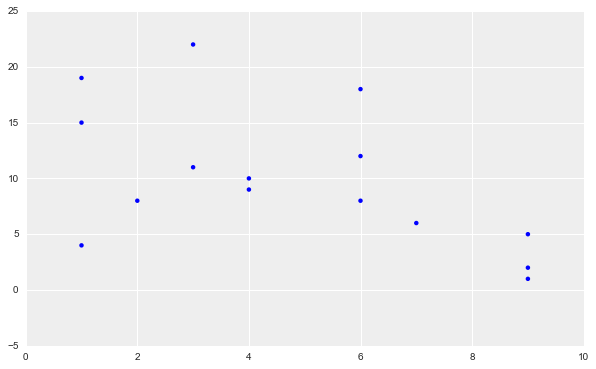

In [10]:
plt.scatter(a,b)